In [1]:
import esda  
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure, scatter, show
from shapely.geometry import Point,Polygon
%matplotlib inline

In [2]:
gdf = gpd.read_file('msoa/MSOA_2011_London_gen_MHW.shp')

In [3]:
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)# 使用Quuen式邻接矩阵
wq.transform = 'r'

/opt/conda/envs/sds2020/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 983 disconnected components.
 There are 983 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

In [9]:
centroids = gdf.geometry.centroid

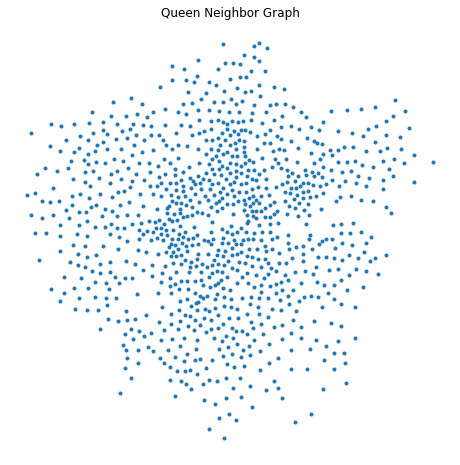

In [10]:
fig = figure(figsize=(8,8))

plt.plot(centroids.x, centroids.y,'.')
for k,neighs in wq.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment.x, segment.y, '-')
plt.title('Queen Neighbor Graph')
plt.axis('off')
plt.show()

In [15]:
y = np.linspace(50.489,52.389,18)
x = np.linspace(-2.725,2.384)
grid = []
for m,i in enumerate(x[:17]):
    for k,j in enumerate(y[:17]):
        cord = np.array([i,j,x[m+1],j,x[m+1],y[k+1],i,y[k+1]]).reshape(4,2)
        grid.append(Polygon(cord))

TypeError: One of the arguments is of incorrect type. Please provide only Geometry objects.

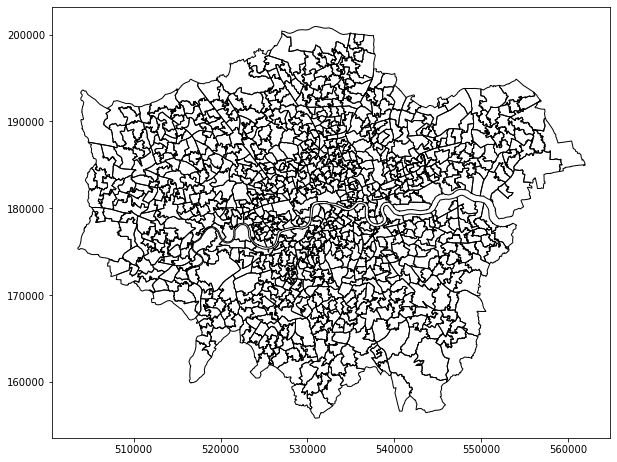

In [18]:
London_gdf = gdf
base = London_gdf.plot(figsize=(10,10),facecolor='None',edgecolor='Black')
area.plot(ax=base,facecolor='None',edgecolor='red')
plt.ylim(50.489,52.389)
plt.xlim(-2.725,2.384)
plt.show()
area = gpd.GeoDataFrame(grid)
area = area.reset_index()
area.columns=['index','geometry']
area.crs={'init':"ESRI:54009"}
